# Scopriamo una nuova specie con la trascrittomica
---


In questa esercitazione vedremo alcuni passaggi che hanno aiutato a scoprire una specie nuova di anfipode antartico a partire da dati trascrittomici. 
La specie è stata denominata *Orchomenella rinamontiae* in onore di [Cesarina (Rina) Monti](https://it.wikipedia.org/wiki/Rina_Monti) e la relativa pubblicazione è stata accettata di recente. Si è trattato di un lavoro multidisciplinare ed uno sforzo collettivo che ha coinvolto ricercatrici e ricercatori dell'Università di Trieste, del Sincrotrone due dei maggiori esperti mondiali nel campo degli Anfipodi: Claude DeBroyer e Ed Hendrycks. 

## preparazione dell'ambiente di lavoro
questa operazione ci consente di installare i software e pacchetti necessari per l'esercitazione, se dovessimo riuscire a farla nel server MedusaACGT basterà eseguire la casella seguente una sola volta per account. Dopo averla eseguita, ricarica la pagina

In [47]:
%%bash
pip install biopython jupyterlab_myst plotly
mamba install -y -q -c bioconda blast mafft bmge iqtree fasttree fastqc bwameth metilene

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


## Introduzione

Il progetto originale del mio dottorato prevedeva lo studio delle risposte trascrittomiche di diverse specie animali acquatiche antartiche ad un piccolo aumento di temperatura (+1.5°C) rispetto alla condizione ambientale. 
Tra queste specie rientrava [*Pseudorchomene plebs*](https://www.marinespecies.org/aphia.php?p=taxdetails&id=597786) (aka *Abyssorchomene plebs*), un anfipode abbondante sulle coste antartiche e di cui diversi esemplari erano stati prelevati e conservati in una spedizione antartica presso la stazione di ricerca Mario Zucchelli.

:::{figure} https://images.marinespecies.org/thumbs/10141_abyssorchomene-plebs-antxxiii-8-st-625-1-625-2-elephant-island.jpg?w=400
Esemplare di *P. plebs*, preso dal sito [marinespecies.org](https://www.marinespecies.org).
:::

Sono stati campionati 27 esemplari in totale, 3 individui per 9 condizioni. Arrivati nel nostro laboratorio, le colleghe del *wetlab* (che lavorano su bancone) hanno estratto il RNA totale e lo hanno preparato per il sequenziamento con tecnologia **Illumina** paired-end. I campioni sono stati poi inviati ad un centro di sequenziamento che ci ha restituito le read grezze.
Come abbiamo visto la scorsa volta ho provveduto a fare un controllo di qualità con **fastqc** e le ho **trimmate** utilizzando **fastp**. Le read erano fortunatamente di buona qualità. Non essendo disponibile un genoma di riferimento per questa specie, la mossa successiva è stata quella di assemblare un **Trascrittoma** di riferimento, da utilizzare per le analisi successive. 

:::{important} 👁️‍🗨️
Il trascrittoma è l'insieme completo delle molecole di RNA trascritte dai geni di un organismo in un determinato momento e in una determinata condizione. Rappresenta quindi tutte le espressioni geniche attive al momento del campionamento e fornisce un quadro dinamico di come un organismo risponde ai vari stimoli ambientali o fisiologici. Al contrario, il genoma è l'intero set di informazioni genetiche presenti nel DNA di un organismo, che rimane relativamente stabile. In altre parole, mentre il genoma rappresenta il potenziale genetico complessivo, il trascrittoma riflette l'effettiva attività genica in uno specifico contesto.
:::

Per l'assemblaggio ho usato **Oyster River Protocol**, un insieme di software basati sui **grafi di deBruijn**. Il processo mette insieme tutti e 27 i campioni per ottenere più informazione possibile, è relativamente lungo e dispendioso in termini di risorse computazionali. Con la prossima cella potrete scaricare il trascrittoma originale che ho assemblato e caricato su [zenodo](https://zenodo.org).

:::{dropdown} Cos'è Zenodo
Zenodo è un archivio digitale gratuito e aperto sviluppato da CERN nell'ambito del progetto OpenAIRE. Consente ai ricercatori di caricare, condividere e archiviare in modo sicuro i risultati dei propri lavori, come articoli, dati scientifici, software e altri materiali. Offre l'assegnazione di DOI (Digital Object Identifier) per garantire una facile citazione e accessibilità, favorendo la diffusione della conoscenza e la collaborazione tra comunità scientifiche.
:::

In [8]:
%%bash
curl --header 'Host: zenodo.org' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:125.0) Gecko/20100101 Firefox/125.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://zenodo.org/records/11091237' --cookie 'session=799d124090acfe1a_6630abd6.PbNjdhifhkrnLDW8fBSwNxC_xDg; csrftoken=eyJhbGciOiJIUzUxMiIsImlhdCI6MTcxNDQ2NTc1MCwiZXhwIjoxNzE0NTUyMTUwfQ.IndzTmZEZzJHc2JzcWtvZ1o5c1FWZHUzTzJWQkJhSG56Ig.gNZUORLAQG6MPa_4fOYLssDrYtc7agjZ7TwINNG3aZzhqgEvl7SfpocGe-e0j5tf2G2450WoptV8M8BLw2axrA; 5569e5a730cade8ff2b54f1e815f3670=5d99aee5574b082c9999e30ff93e5437; mtm_consent_removed=1714985364481' --header 'Upgrade-Insecure-Requests: 1' --header 'Sec-Fetch-Dest: document' --header 'Sec-Fetch-Mode: navigate' --header 'Sec-Fetch-Site: same-origin' --header 'Sec-Fetch-User: ?1' 'https://zenodo.org/records/11091237/files/Galaxy4-%5BPseudorchomene_ORP_no_rRNA.fasta%5D.fasta.gz?download=1' --output 'trascrittoma_assemblato.fasta.gz' && \
gunzip trascrittoma_assemblato.fasta.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37.0M  100 37.0M    0     0  41.6M      0 --:--:-- --:--:-- --:--:-- 41.5M


Se tutto è andato bene ora dovrebbe esserci un altro file in formato **fasta** nella colonna a sinistra. Se non si vede dovrebbe comparire premendo il bottone ↻ .
Possiamo provare ad aprire il file per dare un'occchiata al contenuto, con la cella successiva usiamo il comando `head` per avere un'anteprima delle prime 10 righe del file. 

In [9]:
%%bash
head trascrittoma_assemblato.fasta

>NODE_11745_length_1747_cov_21.055556_g2389_i1
AAAGATATAGACGATCTGTGTCGATATTTGACGCAGCAAGATTATGCAACAACTCCTGCCTGCGATGTGATAGAGCGCTTACTGGATGCTAAGTATACGGACGAAGCTATATTTCGCTTCTTCGATGCGTTTGGCATTTCTGCGACCGCGAAAACCGTACCGGTGGACCGCCCTGCATATGTATTGTCCGTCGCCCGCGACAAGATTCTTCGCAATCACCCGCACACAAAGTTAAATGGAAATAACTGCATCGACCTCGTAGGGACGGGCGGCGACAACAAGAACCCGTACAACATATCTGCGATCGTGGCTGCCAGCGTGCTTCAAAATGGATTCCANNNNNNNNNNAATCGTGGGGACAATTAGTATAGCGCTGCACTTTCAAAGCTTGGACAATATACGAGTTGCACCACAACTTCCACCTATCCTGGCTGCCAGCGTGCTTCAAAATGGATTCCAAATATTGAAGCATGGAAACCAAGGCTTCACTAGCGCAAGTGACACAAGATTGGCCGCAGGACGACCGGCTGATCCAGCCCGACCCTGTCATTTAGTGGCAGCAAAGATTTTTTCTCCGATATCGGCTACAACGTGGACCTCGACGCCAACATGCACATGCTCCTCCATAAGCGGCATCCCTTCGCCTTTCTCTTCGCGCAACAGCTGCACCCGTCTTTCGCCAAATTTGCGCGCGTGCGCAAACTCTATAAGAAGCGCACGTTCTTCAACTTTCTTGGTCCGCTGATCAACCCTTTGGTATCCTATGCGGTTATTGGCGTCACTGCTGAGCGTATGGGCGCTGTCTATGCGAAAGTGCTCGAAGGCAAATTGGAGGCGCTGATCTTGTGTAGCGCAGATGGCGTGGACAAAATTAGCCCTTACACGACGACGACATTGTGGCGTGTGTCGAAGCATGGCGCGACGAAAGAAGTGCTCGATCCGGCATTCGTGCT

## Controllo di qualità del trascrittoma
Quando assembliamo un trascrittoma da usare come riferimento per analisi di espressione genica è importante avere un'idea della **qualità** dell'assemblaggio ottenuto e della sua completezza. Questo significa che dobbiamo verificare che le sequenze siano state assemblate correttamente e che siano rappresentative dello stato trascrizionale. 

Le prime metriche che vedremo sono strettamente quantitative, ossia sono derivate da valori numerici indipendenti da cosa le sequenze rappresentano, ma solo dalla loro composizione:
+ distribuzione delle lunghezze
+ contenuto medio e distribuzione della composizione in GC
+ [N50](https://en.wikipedia.org/wiki/N50,_L50,_and_related_statistics#N50) (contiguità)

Per calcolare queste metriche ci sono software appositi, ma si può fare facilmente anche utilizzando python, cosa che faremo nella prossima cella.

Total number of sequences: 247924
Total number of bases: 129403405
Mean sequence length: 521.9478751552896
Median sequence length: 316.0
N50: 696


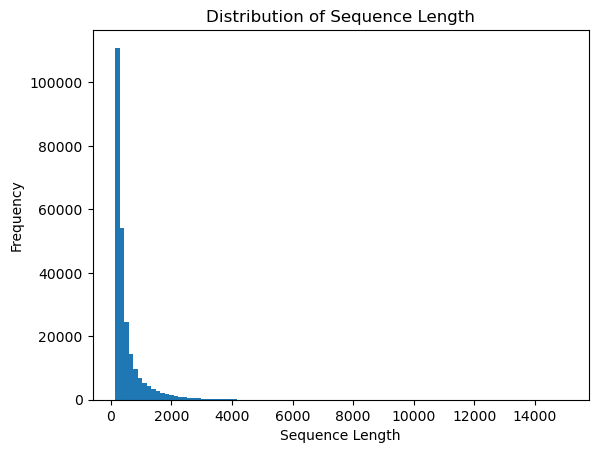

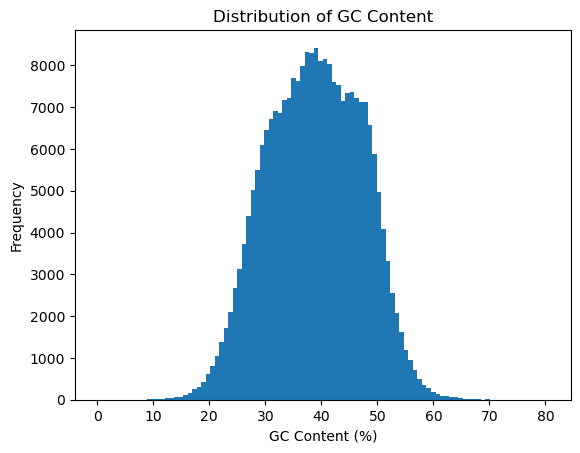

In [11]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np

def compute_statistics(filename):
    total_sequences = 0
    total_bases = 0
    sequence_lengths = []
    gc_contents = []

    for record in SeqIO.parse(filename, "fasta"):
        total_sequences += 1
        total_bases += len(record.seq)
        sequence_lengths.append(len(record.seq))
        
        gc_count = record.seq.count("G") + record.seq.count("C")
        gc_content = gc_count / len(record.seq) * 100
        gc_contents.append(gc_content)
    
    sorted_lengths = sorted(sequence_lengths, reverse=True)
    cumulative_length = 0
    for length in sorted_lengths:
        cumulative_length += length
        if cumulative_length >= total_bases / 2:
            n50 = length
            break
    
    mean_length = total_bases / total_sequences
    median_length = np.median(sequence_lengths)
    
    return total_sequences, total_bases, mean_length, median_length, gc_contents, n50, sequence_lengths

def plot_distribution(data, xlabel, ylabel, title, bins=100):
    plt.hist(data, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

filename = "trascrittoma_assemblato.fasta"
total_sequences, total_bases, mean_length, median_length, gc_contents, n50, sequence_lengths = compute_statistics(filename)

print("Total number of sequences:", total_sequences)
print("Total number of bases:", total_bases)
print("Mean sequence length:", mean_length)
print("Median sequence length:", median_length)
print("N50:", n50)

plot_distribution(sequence_lengths, "Sequence Length", "Frequency", "Distribution of Sequence Length")

plot_distribution(gc_contents, "GC Content (%)", "Frequency", "Distribution of GC Content")


:::{attention} Domande
+ Quale fatto risalta più di tutti rispetto a quanto abbiamo visto la scorsa volta per l'assemblaggio del genoma?
+ Cosa ci stanno mostrando i grafici di distribuzione della lunghezza e del contenuto in GC?
:::

Oltre a queste metriche è importante valutare le sequenze anche a livello di **contenuto**, ci chiediamo quindi a che livello questo trascrittoma sia biologicamente significativo. Per fare questo utilizzeremo il software [**BUSCO**](https://busco.ezlab.org/), che va a quantificare l'informatività dei geni che abbiamo catturato nel nostro assemblaggio. 

:::{important} BUSCO
BUSCO (Benchmarking Universal Single-Copy Orthologs) è un software usato per valutare la qualità e la completezza degli assemblaggi genomici, dei set di geni e dei trascrittomi. Funziona identificando geni ortologhi universali che dovrebbero essere presenti come singole copie in un particolare gruppo tassonomico:

1. **Selezione del database:** L'utente sceglie un set predefinito di geni ortologhi adatti al gruppo tassonomico specifico, come batteri, piante o animali.

2. **Ricerca dei geni ortologhi:** BUSCO cerca questi geni ortologhi nel dataset fornito dall'utente, che può essere un assemblaggio genomico o un set di trascritti.

3. **Valutazione dei risultati:** Classifica i geni trovati come completi, frammentari o mancanti. Questo fornisce una stima della completezza del campione rispetto agli standard universali.

:::

Il risultato dell'esecuzione di BUSCO su questo trascrittoma, usando come riferimento il database **metazoa** (geni che ci aspettiamo di trovare in tutti gli animali) è il seguente:

```raw
    ---------------------------------------------------
    |Results from dataset eukaryota_odb10              |
    ---------------------------------------------------
    |C:79.6%[S:54.1%,D:25.5%],F:12.5%,M:7.9%,n:255     |
    |203    Complete BUSCOs (C)                        |
    |138    Complete and single-copy BUSCOs (S)        |
    |65    Complete and duplicated BUSCOs (D)          |
    |32    Fragmented BUSCOs (F)                       |
    |20    Missing BUSCOs (M)                          |
    |255    Total BUSCO groups searched                |
    ---------------------------------------------------
```

Questi risultati includono 4 categorie in cui i geni che ci si aspettava di trovare in un eukariote sono suddivisi:
+ geni completi (C) ed in singola copia (S)
+ geni completi e duplicati (D)
+ geni frammentati (F)
+ geni assenti (M)

:::{attention} Domanda
Cosa possiamo concludere da questo risultato? Come ci possiamo spiegare la presenza di geni duplicati e di geni frammentati/assenti?
:::

## Esplorazione dei livelli di espressione nelle repliche biologiche
Come anticipato nell'introduzione per ogni condizione sperimentale abbiamo 3 repliche biologiche. L'uso di repliche (minimo 3) è **fondamentale** per garantire dei risultati solidi quando si vanno a fare misurazioni di qualsiasi genere, perchè permette di ridurre l'impatto di variazioni casuali non dovute allo stimolo che stiamo studiando e quindi di escludere **falsi positivi**.
In questo caso stiamo valutando l'espressione genica, ci aspettiamo quindi che individui appartenenti alla stessa replica biologica (quindi sottoposti alle stesse condizioni) presentino valori di espressione simili per i trascritti/geni del trascrittoma. Per verificare questo possiamo eseguire un'analisi visuale dei livelli di espressione di coppie di individui sottoposti alla stessa condizione sperimentale. 

Prima di tutto occorre ottenere una quantificazione dei livelli di espressione dei trascritti, dei quali per ora abbiamo solo le sequenze. Questa misura si ottiene tramite il **mapping**, allineando le read di sequenziamento ai trascritti assemblati. Siccome è un passaggio relativamente lungo il prossimo comando scaricherà direttamente un file contenente i livelli di espressione di un gruppo sperimentale misurati in **TPM**. 

:::{tip} unità di misura dell'espressione genica
ci sono diverse unità di misura dell'espressione genica, ognuna con vantaggi e svantaggi:

1. **Read Counts:**
   - **Descrizione:** Conteggio grezzo del numero di letture di sequenziamento (read) che si allineano a una regione genica.
   - **Vantaggi:** Semplice e diretto da interpretare; non richiede calcoli complessi.
   - **Svantaggi:** Non tiene conto delle differenze nella lunghezza dei geni e nel numero totale di letture, rendendo difficile il confronto diretto tra geni o campioni diversi.

2. **RPKM (Reads Per Kilobase of transcript per Million mapped reads):**
   - **Descrizione:** Normalizza i conteggi per la lunghezza del gene e il totale delle letture.
   - **Vantaggi:** Considera sia la lunghezza del gene che le dimensioni del campione, facilitando il confronto.
   - **Svantaggi:** Non adatto per dati paired-end, può sovrastimare l'espressione dei trascritti più lunghi.

3. **FPKM (Fragments Per Kilobase of transcript per Million mapped reads):**
   - **Descrizione:** Simile a RPKM ma adatto ai dati paired-end, normalizza il numero di frammenti mappati alla lunghezza del trascritto e al totale dei frammenti nel campione.
   - **Vantaggi:** Fornisce una misurazione più accurata per esperimenti paired-end.
   - **Svantaggi:** Può essere influenzato dalla dimensione complessiva del campione, rendendo difficile il confronto tra studi.

4. **TPM (Transcripts Per Million):**
   - **Descrizione:** Normalizza prima i conteggi per la lunghezza del trascritto e poi per il numero totale di trascritti, così da avere proporzioni stabili tra i campioni.
   - **Vantaggi:** Più intuitivo per il confronto tra campioni, dato che la somma totale delle espressioni in ogni campione è la stessa (un milione).
   - **Svantaggi:** Meno diffuso rispetto ad altre metriche, potrebbe richiedere ulteriori conversioni per alcuni confronti.

Ogni unità offre una prospettiva diversa sull'espressione genica, e la scelta della misura dipende spesso dalle specificità dell'esperimento e dagli obiettivi dell'analisi.
:::

In [23]:
%%bash
curl https://raw.githubusercontent.com/54mu/Bioinformatica-esperimenti/main/pseple_merged_tpm.csv > tpm_table.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.3M  100 12.3M    0     0  15.7M      0 --:--:-- --:--:-- --:--:-- 15.6M


ora usiamo python per importare la tabella e confrontare i livelli di espressione

In [25]:
import pandas as pd 
import seaborn as sns 
tpm_data = pd.read_csv("tpm_table.tsv", sep = "\t", index_col=0)
tpm_data.head()

,C1,C2,C3
Name,,,
TRINITY_DN120749_c0_g1_i1,0.434719,0.000000,0.00000
S10307016,0.000000,0.000000,0.00000
NODE_189779_length_334_cov_15.261649_g159095_i0,0.090842,0.000000,0.00000
R10349356,0.173068,0.841097,2.09936
NODE_109452_length_533_cov_19.817992_g82078_i0,0.131219,1.283300,1.22654


Per confrontare tutte le tre coppie di campioni possibili possiamo usare degli scatterplot dei valori di TPM trasformati con la funzione **logaritmo** in modo da mitigare la differenza tra valori estreimi. Essendo campioni appartenenti alla stessa condizione sperimentale (repliche biologiche) ci aspettiamo che ogni punto (che rappresenta un gene) si posizioni approssimativamente sulla bisettrice, come mostrato in figura:

:::{figure}https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12863-021-00996-x/MediaObjects/12863_2021_996_Fig7_HTML.png?as=webp
esempi di scatterplot di confronti a coppie
:::

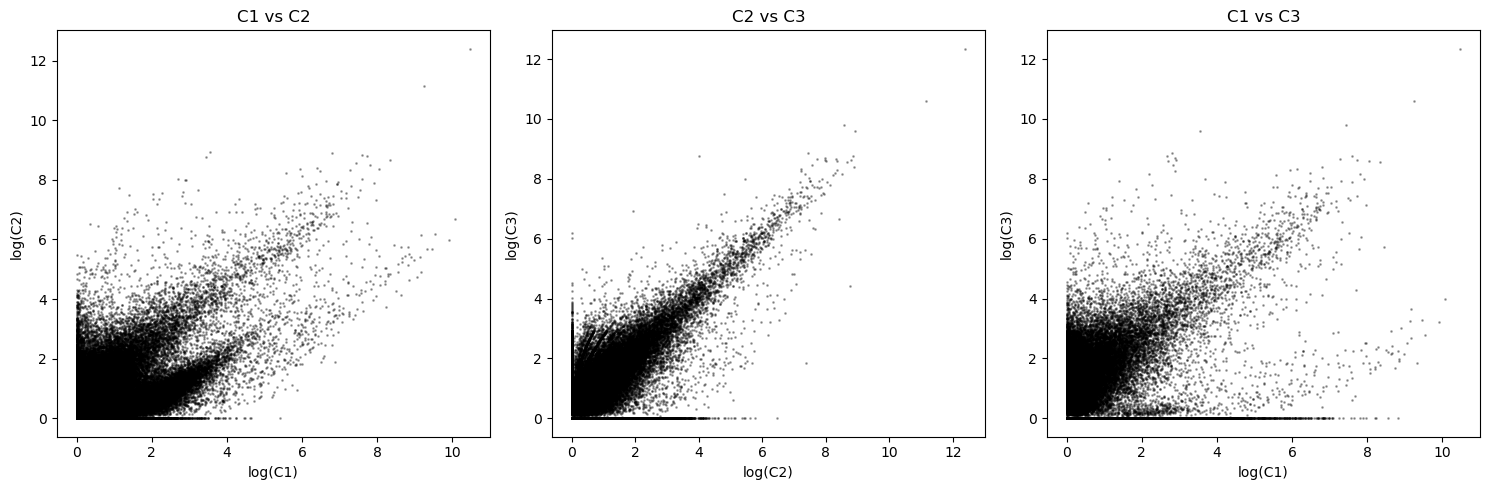

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot for C1 vs C2
axs[0].scatter(np.log(tpm_data['C1'] + 1), np.log(tpm_data['C2'] + 1), alpha = 0.3, c='black', s = 1)
axs[0].set_xlabel('log(C1)')
axs[0].set_ylabel('log(C2)')
axs[0].set_title('C1 vs C2')

# Scatterplot for C2 vs C3
axs[1].scatter(np.log(tpm_data['C2'] + 1), np.log(tpm_data['C3'] + 1), alpha = 0.3, c='black', s = 1)
axs[1].set_xlabel('log(C2)')
axs[1].set_ylabel('log(C3)')
axs[1].set_title('C2 vs C3')

# Scatterplot for C1 vs C3
axs[2].scatter(np.log(tpm_data['C1'] + 1), np.log(tpm_data['C3'] + 1), alpha = 0.3, c='black', s = 1)
axs[2].set_xlabel('log(C1)')
axs[2].set_ylabel('log(C3)')
axs[2].set_title('C1 vs C3')

plt.tight_layout()
plt.show()

È evidente che ci sia qualcosa di strano nei grafici, soprattutto il primo e il terzo mostrano un pattern molto irregolare e lontano dalle nostre aspettative. Come possiamo interpretare questa situazione?

Una possibile risposta è che i campioni siano stati etichettati male e che quindi stiamo in realtà guardando campioni di diverse condizioni sperimentali. Ho verificato questa possibilità con il Prof che si è occupato del campionamento e vi posso dire che può essere esclusa. 

Un'altra possibilità, suggerita anche dal profilo di distribuzione nel contenuto in GC è che i campioni siano contaminati, ma da cosa? Possiamo eseguire un'analisi di sequenza sul nostro trascrittoma per tracciare la probabile origine dei campioni.

## Determinare la presenza di contaminanti nel trascrittoma

Come contaminanti possiamo considerare batteri (attesi comunque all'interno del campione, essendo un animale intero e non asettico), una alta percentuale di rRNA o mDNA, oppure la contaminazione con tessuti di specie diverse.
Il modo più intuitivo e semplice per verificare le contaminazioni da parte di altre specie (compreso *Homo sapiens* nel caso di contaminazioni da laboratorio) è quello di usare le cosiddette **sequenze marker**, dette anche **marcatori molecolari** o **molecular barcodes**.

:::{note} Barcode molecolari

I marcatori molecolari vengono usati perché sono ben conservati (poco variabili) tra le diverse specie all'interno di un gruppo tassonomico, ma contengono anche variazioni sufficienti a livello di sequenza da permettere di distinguere tra loro specie diverse. Questo equilibrio tra conservazione e variabilità rende questi marcatori ideali per identificare e distinguere le specie quando le classiche metodologie basate sulla morfologia non possono essere applicate. 

**I più usati:**
- **COI (Cox1):** Il gene mitocondriale della citocromo c ossidasi I è ampiamente utilizzato come barcode per gli animali, in particolare in studi su pesci e insetti.
- **ITS (spaziatore trascritto interno):** Questo segmento viene spesso utilizzato per identificare funghi e alcune piante.
- **rbcL e matK:** Questi geni dei cloroplasti sono usati come barcode per le piante, fornendo un'alta risoluzione per l'identificazione delle specie.
- **16S rRNA:** Comunemente usato per i batteri e gli archei, offre informazioni tassonomiche precise in studi microbiologici e metagenomici.

Questo li rende strumenti potenti per studi filogenetici, tassonomici e di biodiversità, dove l'identificazione accurata delle specie è essenziale per comprendere le relazioni evolutive e la distribuzione della biodiversità.

:::

In questo caso useremo **COX1**, la subunità 1 della citocromo C ossidasi, un gene mitocondriale. 

Come prima cosa dobbiamo identificare i geni COX1 presenti nel trascrittoma, per farlo useremo la COX1 umana come "esca" per una ricerca di similarità. Andiamo quindi a recuperare la sequenza amminoacidica da NCBI protein con la query `COI AND Homo sapiens [ORGN]`. Sul risultato nel quadrato si clicca su "RefSeq protein" e poi su "fasta".

Ora possiamo copiare la sequenza ed incollarla in un file di testo che possiamo creare dalla colonna a sinistra. 

### Ricerca di marcatori nel trascrittoma

Per la ricerca di similarità nel trascrittoma useremo BLAST, in particolare il comando `tblastn`

BLAST (Basic Local Alignment Search Tool) è uno strumento bioinformatico sviluppato per confrontare una sequenza di DNA, RNA o proteine contro un database per trovare somiglianze. È uno dei programmi più usati per l'analisi delle sequenze, fornendo informazioni sulla funzione o sull'origine evolutiva di una sequenza biologica.

**Sottocomandi di BLAST:**

1. **blastn** (Nucleotide-Nucleotide BLAST):
   - Esegue confronti tra sequenze di DNA o RNA con altre sequenze nucleotidiche nel database.
   - È utile per identificare geni, varianti alleliche o trovare organismi correlati.

2. **blastp** (Protein-Protein BLAST):
   - Confronta una sequenza proteica con altre proteine nel database.
   - È usato per trovare proteine correlate, prevedere funzioni o determinare relazioni evolutive.

3. **blastx**:
   - Traduce una sequenza di nucleotidi in tutte e sei le possibili cornici di lettura e confronta queste traduzioni con un database di proteine.
   - È utile per identificare potenziali prodotti proteici da sequenze di DNA o RNA.

4. **tblastn**:
   - Confronta una sequenza proteica con un database di sequenze nucleotidiche tradotte in tutte le possibili cornici.
   - Può identificare regioni codificanti in un genoma o in trascritti non annotati.

5. **tblastx**:
   - Traduce entrambe le sequenze, query e target, in tutte le sei possibili cornici, e poi esegue confronti tra le traduzioni.
   - È utile per trovare geni correlati e identificare regioni codificanti in genomi.
  
6. **makeblastdb**
   - Questo sottocomando viene utilizzato per creare un database formattato correttamente per BLAST, a partire da una sequenza di input (nucleotidica o proteica).
   - Permette di costruire database personalizzati utilizzando sequenze locali non presenti nei database precompilati (come quelli di NCBI).
   - Accetta vari formati di input, come FASTA, e genera file indice che permettono di eseguire ricerche BLAST in modo rapido ed efficiente.

La prossima cella crea un database di BLAST a partire dal trascrittoma ed effettua una ricerca di similarità utilizzando la COI umana

In [36]:
%%bash
makeblastdb -in trascrittoma_assemblato.fasta -dbtype nucl -parse_seqids
header="qseqid\tsseqid\tpident\tlength\tmismatch\tgapopen\tqstart\tqend\tsstart\tsend\tevalue\tbitscore"
echo -e "$header" > COI_vs_transcriptome.tsv
tblastn -query COI_human.fasta -db trascrittoma_assemblato.fasta -outfmt 6 -evalue 1e-5 -num_threads 4 >> COI_vs_transcriptome.tsv



Building a new DB, current time: 05/06/2024 12:31:17
New DB name:   /home/jovyan/work/trascrittoma_assemblato.fasta
New DB title:  trascrittoma_assemblato.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /home/jovyan/work/trascrittoma_assemblato.fasta
Keep Linkouts: T
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 247924 sequences in 10.0345 seconds.


Guardiamo un attimo il risultato. 

Poi estraiamo dal trascrittoma le sequenze che hanno trovato similarità, utilizzando la seconda colonna del risultato di blast. Per semplicità estraiamo le prime 25 sequenze dalla similarità maggiore.

In [40]:
def read_fasta(filename):
    sequences = {}
    with open(filename, 'r') as file:
        seq_id = None
        seq = ''
        for line in file:
            if line.startswith('>'):
                if seq_id:
                    sequences[seq_id] = seq
                seq_id = line.strip()[1:]
                seq = ''
            else:
                seq += line.strip()
        if seq_id:
            sequences[seq_id] = seq
    return sequences

def write_fasta(ids, sequences):
    with open('selected_sequences.fasta', 'w') as file:
        for seq_id in ids:
            if seq_id in sequences:
                file.write(f'>{seq_id}\n')
                file.write(f'{sequences[seq_id]}\n')
            else:
                print(f'Sequence with ID "{seq_id}" not found.')


blast_result = pd.read_csv("COI_vs_transcriptome.tsv", sep = "\t")

ids = blast_result['sseqid'][:25]
fasta_file = 'trascrittoma_assemblato.fasta'  
sequences = read_fasta(fasta_file)
write_fasta(ids, sequences)


Ora dovreste avere un file a sinistra chiamato `selected_sequences.fasta`. Usiamolo per cercare di identificare le possibili origini del RNA nel nostro trascrittoma.

Apritelo, copiate l'intero contenuto e visitate il sito [https://blast.ncbi.nlm.nih.gov/Blast.cgi](https://blast.ncbi.nlm.nih.gov/Blast.cgi), che mantiene una versione di blast online con accesso a database molto grandi. Qui selezionate blastn, incollate le sequenze nella casella di testo e cliccate "BLAST" in fondo alla pagina. 

Ora scriviamo insieme la lista delle possibili specie trovate. 



### Analisi Filogenetica Dei campioni

Dato il forte segnale di contaminazione e la possibilità di trovarci di fronte ad una specie sconosciuta ho assemblato i trascrittomi di ogni individuo separatamente ed isolato le sequenze COI, delle quali poi ho scelto la più espressa, assumendo che la maggior parte del RNA nel campione fosse quello dell'individuo originale. 
Oltre a questo, una ricercatrice ha estratto la COI dal DNA genomico di un altro esemplare ed eseguito il sequenziamento col metodo **Sanger** per avere la maggiore accuratezza di lettura possibile. Lo stesso individuo è stato fotografato ed incluso in resina per una analisi di tomografia a raggi X a risoluzione micrometrica. 

:::{figure}
:width: 500px

![Sequenziamento Sanger dell'individuo scelto come riferimento](https://github.com/54mu/Bioinformatica-esperimenti/blob/main/Screenshot_20240506_152700.png?raw=true)

![Render tridimensionale dai dati di tomografia a raggi X](https://github.com/54mu/Bioinformatica-esperimenti/blob/main/orch3D.png?raw=true)

:::

La scansione 3D è stata inviata ad esperti di tassonomia di anfipodi per la classificazione basata sulla morfologia, nel frattempo la sequenza Sanger e quelle derivate dai trascrittomi sono state utilizzate per una **analisi filogenetica**. Questo tipo di analisi si basa sull'allineamento di sequenze marker di diversa origine per calcolarne le distanze a coppie (termine tecnico **pairwise distance**) usando matrici di sostituzione basate sulle mutazioni osservate in natura. Queste distanze vengono poi utilizzate per comporre un albero filogenetico, che rappresenta le relazioni evolutive tra le sequenze. Nel nostro caso questo albero ci aiuterà a collocare i nostri individui nella giusta famiglia e nel giusto genere, dato che la morfologia conferma che si tratti di una nuova specie mai descritta 🥳. 
Prima di tutto bisogna costruire un database di marker (COI in questo caso) di tutte le specie note per cui esiste una sequenza depositata a cui aggiungere le nostre sequenze. Questo si fa con le giuste query su NCBI nucleotide e richiede un po' di tempo, quindi la prossima cella scaricherà il file con le sequenze della superfamiglia **Lysianassoidea** già pronte per l'analisi.

In [41]:
%%bash
wget https://raw.githubusercontent.com/54mu/Bioinformatica-esperimenti/main/sequenze_lysianassoidea.fasta

--2024-05-06 13:46:48--  https://raw.githubusercontent.com/54mu/Bioinformatica-esperimenti/main/sequenze_lysianassoidea.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816118 (797K) [text/plain]
Saving to: ‘sequenze_lysianassoidea.fasta’

     0K .......... .......... .......... .......... ..........  6% 3.45M 0s
    50K .......... .......... .......... .......... .......... 12% 3.62M 0s
   100K .......... .......... .......... .......... .......... 18% 15.1M 0s
   150K .......... .......... .......... .......... .......... 25% 17.5M 0s
   200K .......... .......... .......... .......... .......... 31% 6.53M 0s
   250K .......... .......... .......... .......... .......... 37% 16.7M 0s
   300K .......... .......... .......... .......... .......... 43% 

Ora scaricate il file `sequenze_lysianassoidea.fasta` e continuiamo l'analisi su NGPhylogeny.fr
Qui scegliamo OneClick e nel menu a sinistra la voce relativa a FastTree. Questo ci permetterà di ottenere un risultato abbastanza velocemente a discapito della precisione.

L'ambiente di questo foglio è pronto anche per chi volesse divertirsi(?) a ripetere l'analisi dalla riga di comando.

L'albero mostrato sotto è quello definitivo con tutti i crismi che sarà presente nella pubblicazione. 

:::{figure}https://github.com/54mu/Bioinformatica-esperimenti/blob/main/orchtree.jpg?raw=true
albero filogenetico ripulito e pronto per la pubblicazione
:::


# Epigenetica e metilazione del DNA
---

L'epigenetica è un ramo della biologia che studia le modifiche ereditabili dell'espressione genica che non alterano la sequenza del DNA. Tali modifiche, definite epigenetiche, influenzano il modo in cui i geni vengono attivati o silenziati e possono essere trasmesse attraverso le generazioni cellulari.

Uno dei meccanismi epigenetici più studiati è la metilazione del DNA. Questo processo comporta l'aggiunta di un gruppo metilico (-CH₃) a una citosina presente nella sequenza CpG del DNA. La metilazione generalmente agisce reprimendo l'espressione genica, contribuendo al controllo dello sviluppo, alla differenziazione cellulare e alla regolazione dell'espressione genica.

:::{note}CpG islands
Le isole CpG sono tratti di DNA caratterizzati da una concentrazione elevata di coppie di basi citosina-guanina. Queste isole si trovano spesso nelle regioni promotrici dei geni, cioè nelle aree dove inizia la trascrizione del DNA per la sintesi dell’RNA
:::

Anomalie nella metilazione del DNA sono state associate a diverse condizioni patologiche, come il cancro, i disordini neurodegenerativi e le malattie autoimmuni. Pertanto, lo studio della metilazione del DNA è cruciale per comprendere le basi epigenetiche delle malattie e potrebbe portare allo sviluppo di nuove strategie terapeutiche.

Questa esercitazione è basata sullo studio [Li *et. al.*, 2015](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118453).

Questo studio ha esplorato le alterazioni epigenetiche associate al cancro al seno, concentrandosi in particolare sui modelli di metilazione del DNA nei diversi tipi di tessuto mammario e di tumori associati. I ricercatori hanno utilizzato il sequenziamento dell'intero genoma con bisolfito (whole-genome bisulfite sequencing) per analizzare e confrontare i metilomi (profili completi di metilazione del DNA) del tessuto mammario normale, dei fibroadenomi benigni, dei carcinomi duttali invasivi e della linea cellulare di cancro al seno MCF7.

:::{note} Bisulfite sequencing
In questo metodo, il DNA viene trattato con bisolfito di sodio, che converte la citosina non metilata in uracile, mentre le citosine metilate rimangono invariate. Durante il sequenziamento successivo, le citosine non metilate appaiono come timine, consentendo di distinguere tra le basi metilate e non metilate e fornendo un profilo dettagliato delle regioni metilate nel genoma. [Pagina Wikipedia](https://en.wikipedia.org/wiki/Bisulfite_sequencing)
:::

## Sequenziamento e preparazione delle read

Nella prima parte dell'esperimento (che qui saltiamo per ragioni di tempo, abbiamo già visto questi meccanismi) il DNA è stato trattato con bisolfito di sodio e successivamente sequenziato. Le read di sequenziamento, quando sottoposte a controllo qualità producevano il seguente grafico di composizione nucleotidica:

:::{figure}https://training.galaxyproject.org/training-material/topics/epigenetics/images/fastqc.png
:::

:::{warning}Domanda
Ci vedete qualcosa di strano rispetto a quelle che abbiamo visto la scorsa volta?
:::

Le read sono state poi **trimmate** e **mappate** sul genoma umano di riferimento con un allineatore in grado di tollerare le mutazioni C→T indotte dal bisolfito di sodio e di quantificare quindi anche gli eventi di metilazione delle citosine. 

## Analisi di metilazione differenziale 

Ora scaricheremo il dataset pre-processato per andare a valutare le differenze di metilazione a livello dei geni e scoprire se tra le diverse condizioni sperimentali dei campioni esistoni differenze significative ed eventualmente determinare i geni la cui metilazione/demetilazione determina un certo fenotipo.

Il comando nella cella successiva scarica i file e li ordina al volo usando bedtools.

:::{dropdown}BEDtools
Bedtools è una raccolta di strumenti software progettati per l'analisi e la manipolazione di file in formato BED (Browser Extensible Data), un formato comunemente utilizzato per rappresentare regioni genomiche. Bedtools offre una serie di funzionalità, come l'intersezione, il confronto e la sottrazione di regioni genomiche, consentendo agli utenti di eseguire operazioni complesse sui dati di genomica e bioinformatica. Questi strumenti sono ampiamente impiegati nella ricerca genomica per compiti quali l'identificazione di sovrapposizioni tra annotazioni genomiche, la creazione di regioni uniche o la combinazione di dati da diversi esperimenti.
:::

In [57]:
%%bash

curl https://zenodo.org/records/557099/files/NB2_CpG.meth.bedGraph?download=1 | bedtools sort -i - > NB2.bedgraph
curl https://zenodo.org/records/557099/files/NB1_CpG.meth.bedGraph?download=1 | bedtools sort -i - > NB1.bedgraph
curl https://zenodo.org/records/557099/files/BT089_CpG.meth.bedGraph?download=1 | bedtools sort -i - > BT089.bedgraph
curl https://zenodo.org/records/557099/files/BT126_CpG.meth.bedGraph?download=1 | bedtools sort -i - > BT126.bedgraph


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  11.9M      0  0:01:05  0:01:05 --:--:-- 11.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  441M  100  441M    0     0  12.0M      0  0:00:36  0:00:36 --:--:-- 12.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  705M  100  705M    0     0  11.9M      0  0:00:59  0:00:59 --:--:-- 11.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  566M  100  566M    0     0  12.0M      0  0:00:46  0:00:46 --:--:-- 12.3M


Adesso scarichiamo anche un file in formato `bed` che contiene le coordinate delle cpg islands già precalcolate per il genoma umano, questo servirà per limitare la ricerca di regioni differenzialmente metilate su *loci* predefiniti, semplificando il lavoro. 
La cella successiva produce anche un'anteprima del file `cpg_islands.bed`

In [70]:
%%bash
curl https://zenodo.org/records/557099/files/CpGIslands.bed?download=1 > cpg_islands.bed
head cpg_islands.bed

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  794k  100  794k    0     0  2144k      0 --:--:-- --:--:-- --:--:-- 2148k


1	28735	29737	CpG:_111
1	135124	135563	CpG:_30
1	199251	200121	CpG:_104
1	368792	370063	CpG:_99
1	381172	382185	CpG:_84
1	491107	491546	CpG:_29
1	597839	598734	CpG:_94
1	609358	611269	CpG:_171
1	778604	779167	CpG:_60
1	827036	828065	CpG:_111


### identificazione delle regioni differenzialmente metilate (DMRs)
Useremo ora lo strumento **metilene** per trovare le regioni differenzialmente metilate tra la condizione normale e quella tumorale. Verrà effettuato un test statistico, utile per dare un peso alle nostre osservazioni, permettendoci di ridurre il più possibile il rumore di fondo ed i falsi positivi. Il test statistico in questione è il [Test di Wilcoxon Mann Whitney](https://it.wikipedia.org/wiki/Test_di_Wilcoxon-Mann-Whitney), che ci fornirà un valore detto [p-value](https://it.wikipedia.org/wiki/Valore_p) corretto col metodo di [Bonferroni](https://it.wikipedia.org/wiki/Correzione_di_Bonferroni). 

Innanzitutto metilene richiede la creazione di un unico file che definisca i valori di metilazione delle regioni genomiche ed i raggruppamenti dei campioni:

In [58]:
%%bash
metilene_input.pl --in1 NB1.bedgraph,NB2.bedgraph --in2 BT089.bedgraph,BT126.bedgraph --h1 normal --h2 tumor

[WARNING]	Mon May 6, 15:58:8, 2024	Input files need to be SORTED, i.e., use "bedtools sort -i file >file.sorted"
[INFO]	Mon May 6, 15:58:8, 2024	Checking flags


/opt/conda/bin/bedtools


[INFO]	Mon May 6, 15:58:8, 2024	Write metilene input to metilene_normal_tumor.input

*****

[BASIC CALL:] metilene_executable -t 4 -a normal -b tumor metilene_normal_tumor.input >out.file
Please adjust executable of metilene, number of threads (-t) and names of groups (-a, -b). For further parameters: metilene_executable --help


Il comando sopra creerà il file `metilene_normal_tumor.input`, che usiamo nella cella successiva per calcolare le regioni differenzialmente metilate. 
Come vedete il comando è in realtà una **pipeline** di comandi, che si passano gli output. Di default, metilene produce i messaggi di log e gli output come testo visibile, cosa che se incontrollata bloccherebbe questa pagina. Quindi con '2>' diciamo di scrivere i log nel file `metilene.log` e con ol carattere `|` passiamo l'output relativo alle regioni metilate al comando sort, che si occuperà di ordinare i risultati per cromosoma e significatività, salvando poi il risultato finale nel file `metilene.output.tsv`

In [68]:
%%bash
metilene -t 4 -f 2 -a tumor -b normal -B cpg_islands.bed metilene_normal_tumor.input 2> metilene.log | sort -V -k1,1 -k2,2n > metilene.output.tsv

ora passiamo questo file al comando `metilene_output.pl` che lo filtrerà e fornirà un piccolo report dei risultati

In [69]:
%%bash
metilene_output.pl -q metilene.output.tsv

[INFO]	Mon May 6, 16:26:40, 2024	Checking flags
[INFO]	Mon May 6, 16:26:40, 2024	Filter DMRs.
[INFO]	Mon May 6, 16:26:40, 2024	Wrote 774 DMRs with adj. p-value<0.05, a minimum absolute difference>=0.1, a minimum length [CpG]>=10 and a minimum length [nt]>=0
[INFO]	Mon May 6, 16:26:40, 2024	Bedgraph file containing DMR difference: /home/jovyan/work/metilene_qval.0.05.bedgraph
[INFO]	Mon May 6, 16:26:40, 2024	Plot DMR statistics.
Warning message:
Removed 2 rows containing missing values (`geom_bar()`). 
Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead. 


null device 
          1 


Ora possiamo visualizzare i risultati aprendo la tabella `metilene_qval.0.05.out` e processarli con python nella cella successiva

In [87]:
import pandas as pd 
import plotly.express as px 
header = [
    'chr', 'start', 'stop', 'q-value',
    'mean methylation difference', '#CpGs',
    'mean g1', 'mean g2'
]
dmrs = pd.read_csv("metilene_qval.0.05.out", sep = "\t", names = header)
dmrs.head()

,chr,start,stop,q-value,mean methylation difference,#CpGs,mean g1,mean g2
0,1,1032586,1034858,1.469000e-03,-0.260630,66,0.26177,0.522400
1,1,1162663,1165204,3.472000e-26,-0.474782,100,0.25210,0.726880
2,1,1173934,1174765,7.747500e-04,0.365682,24,0.76420,0.398520
3,1,1332055,1333606,1.545200e-03,-0.108488,103,0.43000,0.538490
4,1,2290759,2291130,9.162300e-04,0.461399,19,0.48649,0.025089


Adesso disegnamo un **volcano plot**, che mette in relazione le differenze in metilazione con la significatività di tali differenze. Sull'asse $x$ avremo la differenza di metilazione, mentre sull'asse $y$ applicheremo la trasformazione $-log$ al *p-value* per renderlo lineare e direttamente proporzionale alla significatività:


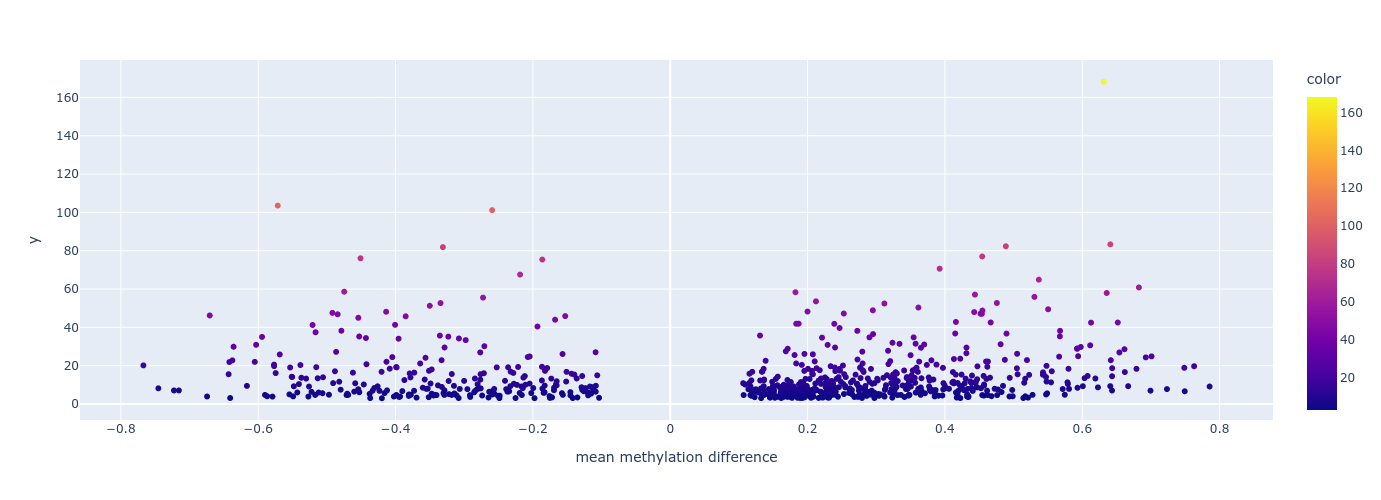

In [95]:
fig = px.scatter(dmrs, x = "mean methylation difference", y = -np.log(dmrs['q-value']), color = -np.log(dmrs['q-value']), 
                 width = 500, height = 500, hover_data=['chr', 'start','stop'])
fig.show()

Ora posssiamo prendere le coordinate delle cpg islands più significative e valutare nei pressi di quali geni si trovino utilizzando un genome browser tipo quello di [UCSC](https://genome-euro.ucsc.edu/cgi-bin/hgGateway?hgsid=338735253_twmomjfQodaHIDEhB8IrH8OxZGDJ)